In [ ]:
! pip install pandas matplotlib seaborn scikit-learn

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Business Understanding

## Load and preprocess data

In [35]:

df = pd.read_csv('churn_data.csv')

df = df.drop('customerID', axis=1)

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = pd.get_dummies(df, columns=['PhoneService', 'Contract', 'PaymentMethod'], drop_first=True)
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7043 non-null   int64  
 1   MonthlyCharges                         7043 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7043 non-null   int64  
 4   PhoneService_Yes                       7043 non-null   bool   
 5   Contract_One year                      7043 non-null   bool   
 6   Contract_Two year                      7043 non-null   bool   
 7   PaymentMethod_Credit card (automatic)  7043 non-null   bool   
 8   PaymentMethod_Electronic check         7043 non-null   bool   
 9   PaymentMethod_Mailed check             7043 non-null   bool   
dtypes: bool(6), float64(2), int64(2)
memory usage: 261.5 KB


## Prepare data for Training

In [36]:

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=60)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train the Logistic Regression model with the new set of features

In [37]:
model = HistGradientBoostingClassifier(random_state=60)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model with new set of features
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy with standardized features: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print('Classification Report:\n', classification_report_str)

Accuracy with standardized features: 0.79
Confusion Matrix:
[[687  83]
 [140 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       770
           1       0.64      0.51      0.57       287

    accuracy                           0.79      1057
   macro avg       0.73      0.70      0.71      1057
weighted avg       0.78      0.79      0.78      1057



## Plot Confusion Matrix

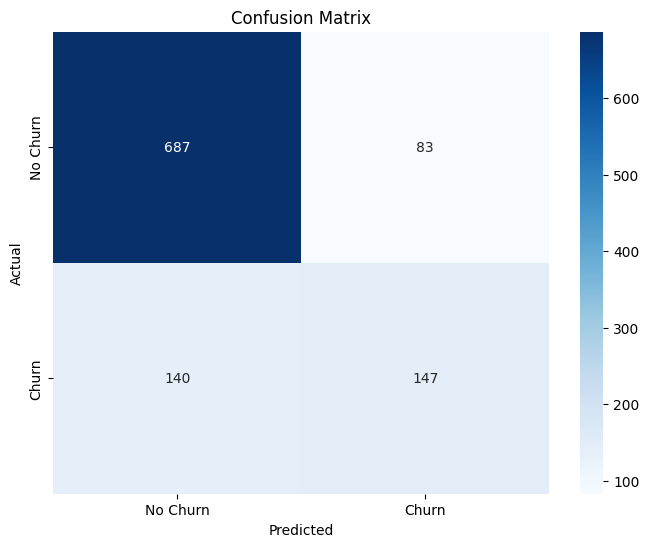

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# 2. Data UNderstanding - EDA

## Bar plots

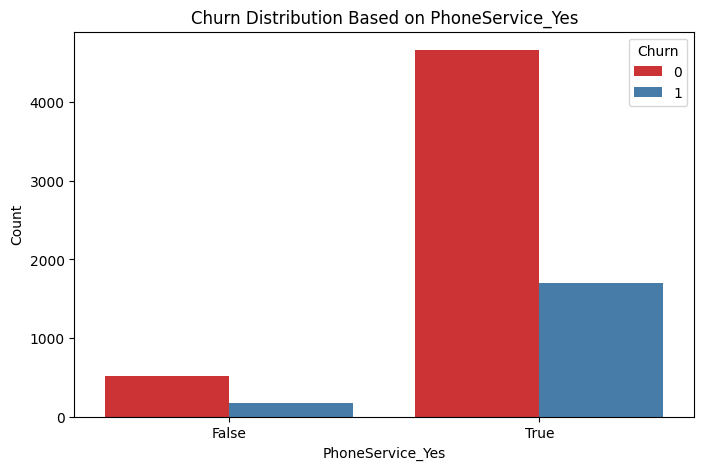

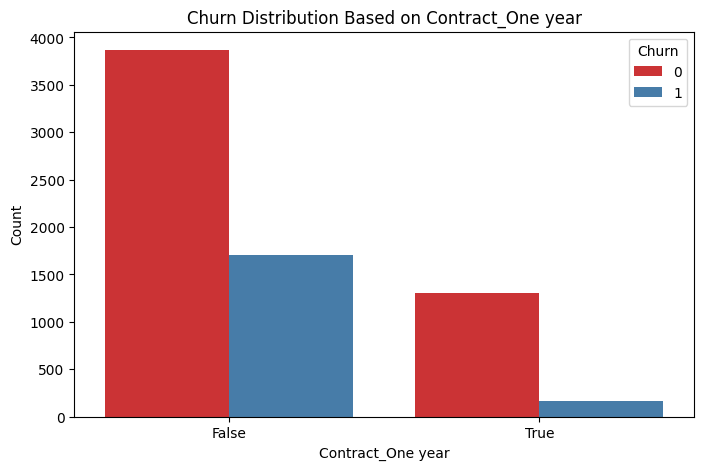

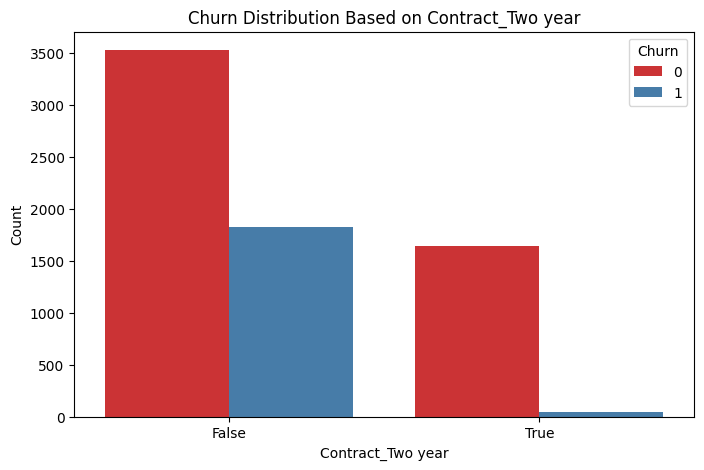

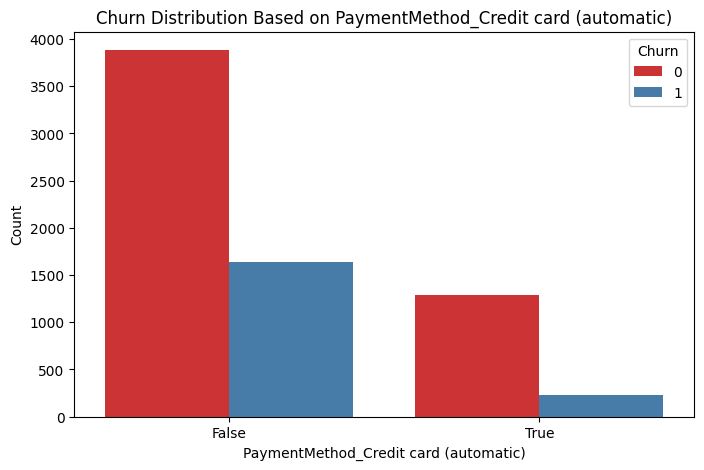

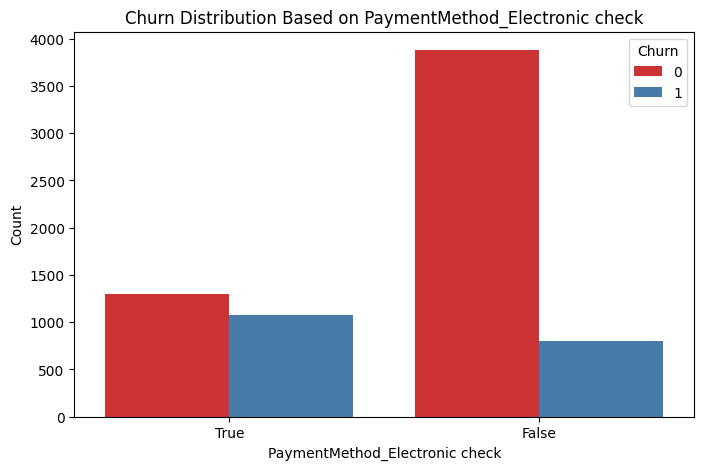

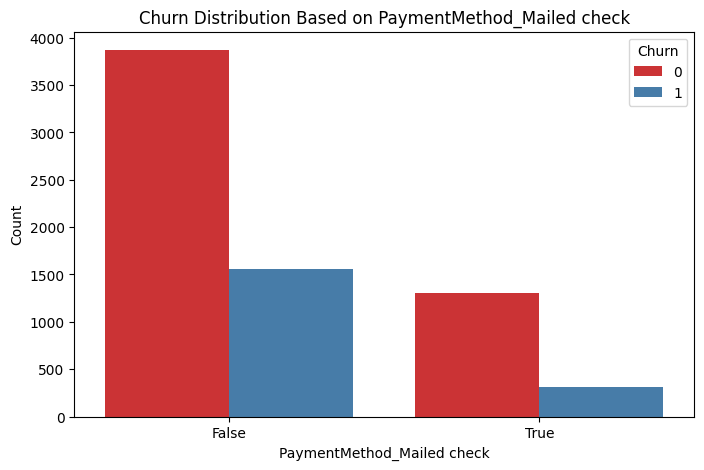

In [39]:
cat_columns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# boolean to strings conversion
bool_columns = ['PhoneService_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

for column in bool_columns:
    df[column] = df[column].astype(str)
    
# Bar plots
for column in cat_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, hue='Churn', palette='Set1')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Churn Distribution Based on {column}')
    plt.show()

## Histogram with the Churn as the hue for a numeric column - MonthlyCharges

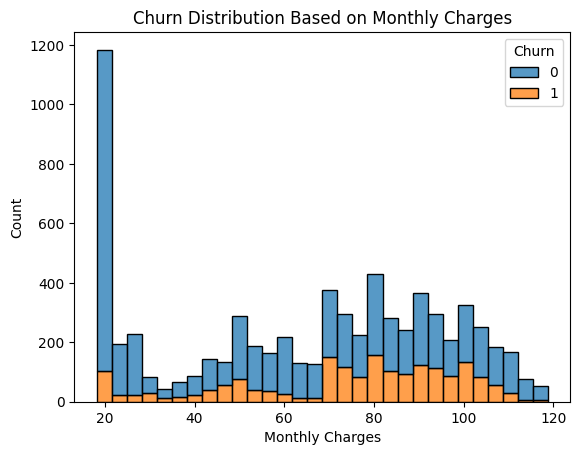

In [40]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30)
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Churn Distribution Based on Monthly Charges')
plt.show()

## Histogram with the target Churn as the hue for TotalCharges

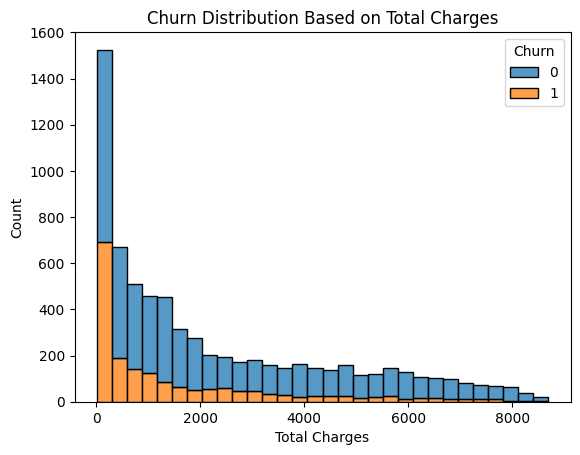

In [41]:
sns.histplot(data=df, x='TotalCharges', hue='Churn', multiple='stack', bins=30)
plt.xlabel('Total Charges')
plt.ylabel('Count')
plt.title('Churn Distribution Based on Total Charges')
plt.show()

##  Box plot

/tmp/ipykernel_40571/402741493.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set1')


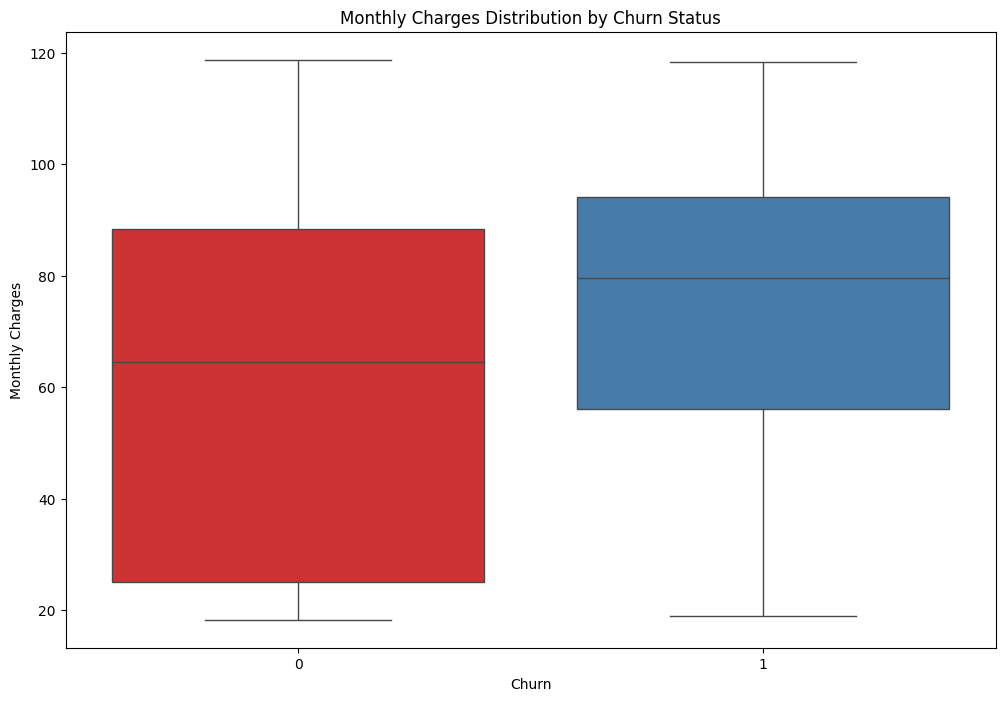

In [42]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set1')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges Distribution by Churn Status')
plt.show()

# Analysis and Interpretation

## Model Evaluation Metrics

Accuracy: 0.79

Confusion Matrix

[[687 83]
 [140 147]]

Classification Report

```shell 
	precision	recall	f1-score	 support
0       0.83     0.89      0.86      	770
1       0.64     0.51      0.57       	287
```


```shell
accuracy                         0.79      1057
macro avg      0.73      0.70    0.71      1057
weighted avg   0.78      0.79    0.78      1057
```

**Interpretation**

Accuracy - The model achieved an accuracy of 79%, which represents the overall correct predictions out of the total predictions.

Confusion Matrix - The confusion matrix provides a detailed breakdown of the model's predictions

    True Negatives (TN) for class 0 (non-churn): 687
    True Positives (TP) for class 1 (churn): 147
    False Positives (FP): 83 (Predicted as non-churn but actually churn)
    False Negatives (FN): 140 (Predicted as churn but actually non-churn)

**Classification Report**

```shell 
Precision (class 0): 0.83 - 83% of the predicted non-churn cases were correct.

Recall (class 0): 0.89 - Out of all actual non-churn cases, the model identified 89% of them.

F1-score (class 0): 0.86 - A balanced measure considering both precision and recall for non-churn class.

Precision (class 1): 0.64 - 64% of the predicted churn cases were correct.

Recall (class 1): 0.51 - Out of all actual churn cases, the model identified 51% of them.

F1-score (class 1): 0.57 - A balanced measure considering both precision and recall for the churn class.
```



The model performs well in predicting non-churn cases (class 0) with high precision (84%) and recall (89%), as indicated by the high F1-score (0.87). However, the model's performance for predicting churn cases (class 1) is not as strong, with lower precision (64%), recall (51%), and F1-score (0.57).

## Histogram with Churn as Hue (Monthly Charges)

The histogram shows the distribution of monthly charges with different colors representing churn and no-churn instances. There is a concentration of churn instances around lower monthly charges, suggesting that customers with lower monthly charges are more likely to churn.

## Bar Plots for Categorical Columns

The bar plots show the distribution of different categorical variables with respect to the target variable Churn i.e., churn - 1 & no-churn 0. Each bar represents the count of observations for each category, and the bars are color-coded based on the Churn status.

**Interpretation**

PhoneService_Yes -  The majority of customers have phone service (1). The churn distribution shows that customers with phone service tend to have a slightly higher churn rate compared to those without.

Contract_One year and Contract_Two year - Customers with one- and two-year contracts (1) have a lower churn rate compared to those with a month-to-month contract (0).

PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check - Customers with electronic check payment methods (1) have a higher churn rate compared to credit card and mailed check methods.

## Histogram with Churn as Hue (Total Charges)
This histogram depicts the distribution of total charges, with churn and no-churn instances differentiated by color. It reveals that many churn instances occur among customers with lower total charges.

## Boxplot for Monthly Charges by Churn Status
The boxplot illustrates the distribution of monthly charges for churned and non-churned customers. It is observed that the median monthly charges for churned customers are relatively higher than those for non-churned customers. Additionally, the boxplot indicates a wider range of charges for churned customers, suggesting higher variability in monthly charges among customers who churn.
The boxplot further emphasizes the difference in monthly charges between churned and non-churned customers.